<a href="https://colab.research.google.com/github/syedtariqshah789/ML_Projects/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"syedtariqshah","key":"59e55a5ffcf71f2ba9656d6a5eedeff8"}'}

In [7]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download -d rounakpaul/telecust1000

telecust1000.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!unzip telecust1000.zip

Archive:  telecust1000.zip
  inflating: teleCust1000t.csv       


In [10]:
import pandas as pd
import sklearn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv('teleCust1000t.csv')

In [12]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64,4,5,0,0,2,1
1,3,11,33,1,7,136,5,5,0,0,6,4
2,3,68,52,1,24,116,1,29,0,1,2,3
3,2,33,33,0,12,33,2,0,0,1,1,1
4,2,23,30,1,9,30,1,2,0,0,4,3


In [13]:
a=df['custcat'].value_counts().to_frame()
a.rename(columns={'custcat':'Number of Customers'},inplace = True)
a.index.name='Customer Category'
a

,Number of Customers
Customer Category,
3,281
1,266
4,236
2,217


In [14]:
df.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
region,1.000000,0.016388,0.015034,-0.080637,0.010320,0.023765,-0.057952,0.016335,0.005595,0.050596,-0.065158,-0.023771
tenure,0.016388,1.000000,0.490217,0.154171,0.522952,0.242912,-0.109797,0.520288,0.171143,0.023533,-0.036592,0.166691
age,0.015034,0.490217,1.000000,-0.014433,0.660435,0.327948,-0.154857,0.670047,0.429440,-0.011419,-0.254993,0.056909
marital,-0.080637,0.154171,-0.014433,1.000000,-0.012051,-0.043984,0.001400,-0.002891,-0.078109,0.008345,0.625999,0.083836
address,0.010320,0.522952,0.660435,-0.012051,1.000000,0.226781,-0.128330,0.463291,0.292503,0.008363,-0.201645,0.067913
income,0.023765,0.242912,0.327948,-0.043984,0.226781,1.000000,0.113939,0.516349,-0.083651,0.038706,-0.097591,0.134525
ed,-0.057952,-0.109797,-0.154857,0.001400,-0.128330,0.113939,1.000000,-0.228580,-0.114229,0.006704,0.021045,0.193864
employ,0.016335,0.520288,0.670047,-0.002891,0.463291,0.516349,-0.228580,1.000000,0.277401,0.046016,-0.134683,0.110011
retire,0.005595,0.171143,0.429440,-0.078109,0.292503,-0.083651,-0.114229,0.277401,1.000000,0.053906,-0.140120,0.008908
gender,0.050596,0.023533,-0.011419,0.008345,0.008363,0.038706,0.006704,0.046016,0.053906,1.000000,0.016556,-0.004966


In [15]:
b=df.columns
b

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

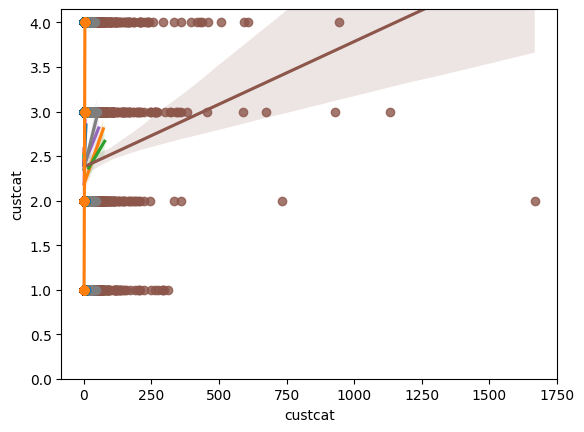

In [16]:
for i in b:
  sns.regplot(x=i,y='custcat',data=df)
  plt.ylim(0,)

In [17]:
x=(df.drop('custcat',axis=1)).values

In [18]:
y=df[['custcat']].values
y[0:5]

array([[1],
       [4],
       [3],
       [1],
       [3]])

In [19]:
y.shape

(1000, 1)

In [20]:
from sklearn import preprocessing
xnor=preprocessing.StandardScaler().fit(x).transform(x.astype('float'))
xnor[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xnor,y,test_size=0.2,random_state=4)
print('Train set:', x_train.shape,y_train.shape)
print('Test Set:',x_test.shape,y_test.shape)

Train set: (800, 11) (800, 1)
Test Set: (200, 11) (200, 1)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
k=4
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [23]:
yhat=knn.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [24]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
print(accuracy_score(y_test,yhat))
#print(precision_score(y_test,yhat))
#print(recall_score(y_test,yhat))
#print(f1_score(y_test,yhat))

0.32


In [25]:
ks=10
accuracy=np.zeros(ks-1)
std=np.zeros(ks-1)
for i in range(1,ks):
  knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  yhat=knn.predict(x_test)
  accuracy[i-1]=accuracy_score(y_test,yhat)
  std[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

accuracy


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

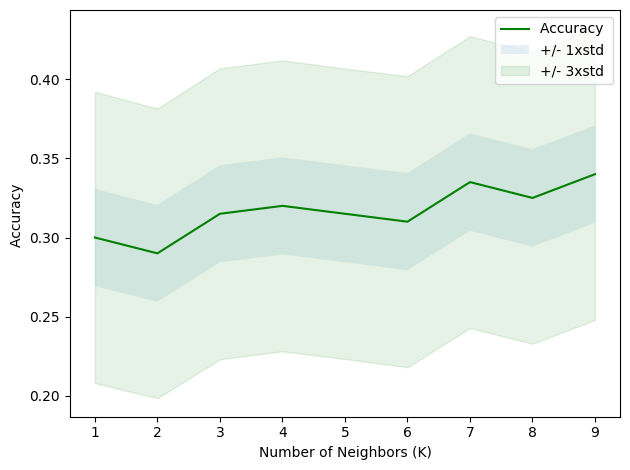

In [26]:
plt.plot(range(1,ks),accuracy,color='green')
plt.fill_between(range(1,ks),accuracy+1*std,accuracy-1*std,alpha=0.10)
plt.fill_between(range(1,ks),accuracy+3*std,accuracy-3*std,alpha=0.10,color='green')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [27]:
print('The highest accuracy i.e.',accuracy.max(),'was obtained at K= ',accuracy.argmax()+1)

The highest accuracy i.e. 0.34 was obtained at K=  9
